In [95]:
import scanpy as sc
import singleCellHaystack as hs

In [2]:
adata = hs.load_toy()
res = hs.haystack(adata, coord="tsne")

> starting haystack ...
> entering array method ...
> scaling coordinates ...
> calculating feature stds ...
> calculating grid points ...
> calculating distance to cells ...
> calculating densities ...
> calculating Q dist ...
> calculating KLD for 500 features ...


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 7342.35it/s]


> calculating feature's CV ...
> selecting genes to randomize ...
> calculating randomized KLD ...


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 94.52it/s]


> calculating P values ...
> done.


In [3]:
sum = res["results"]
sum.head(10)

,gene,KLD,pval,pval_adj,logpval,logpval_adj
241,gene_242,1.813896,4.325322e-35,2.162661e-32,-34.363982,-31.665012
61,gene_62,2.078623,1.839024e-34,9.195120e-32,-33.735413,-31.036443
338,gene_339,1.837666,2.756699e-33,1.378349e-30,-32.559611,-29.860641
496,gene_497,1.952764,6.978437e-33,3.489218e-30,-32.156242,-29.457272
78,gene_79,2.270134,8.485482e-33,4.242741e-30,-32.071323,-29.372353
443,gene_444,2.003255,2.553179e-31,1.276589e-28,-30.592919,-27.893949
98,gene_99,2.031482,7.208977e-31,3.604489e-28,-30.142126,-27.443156
274,gene_275,1.726572,7.393585e-31,3.696792e-28,-30.131145,-27.432175
350,gene_351,1.774843,3.294957e-30,1.647479e-27,-29.482150,-26.783180
316,gene_317,1.759560,6.434206e-30,3.217103e-27,-29.191505,-26.492535


In [4]:
gene_mods = hs.cluster_genes(adata, res, n_clusters=4, n_genes=20)

In [5]:
gene_mods

,gene,cluster
0,gene_242,3
1,gene_62,1
2,gene_339,1
3,gene_497,1
4,gene_79,1
5,gene_444,0
6,gene_99,3
7,gene_275,1
8,gene_351,1
9,gene_317,0


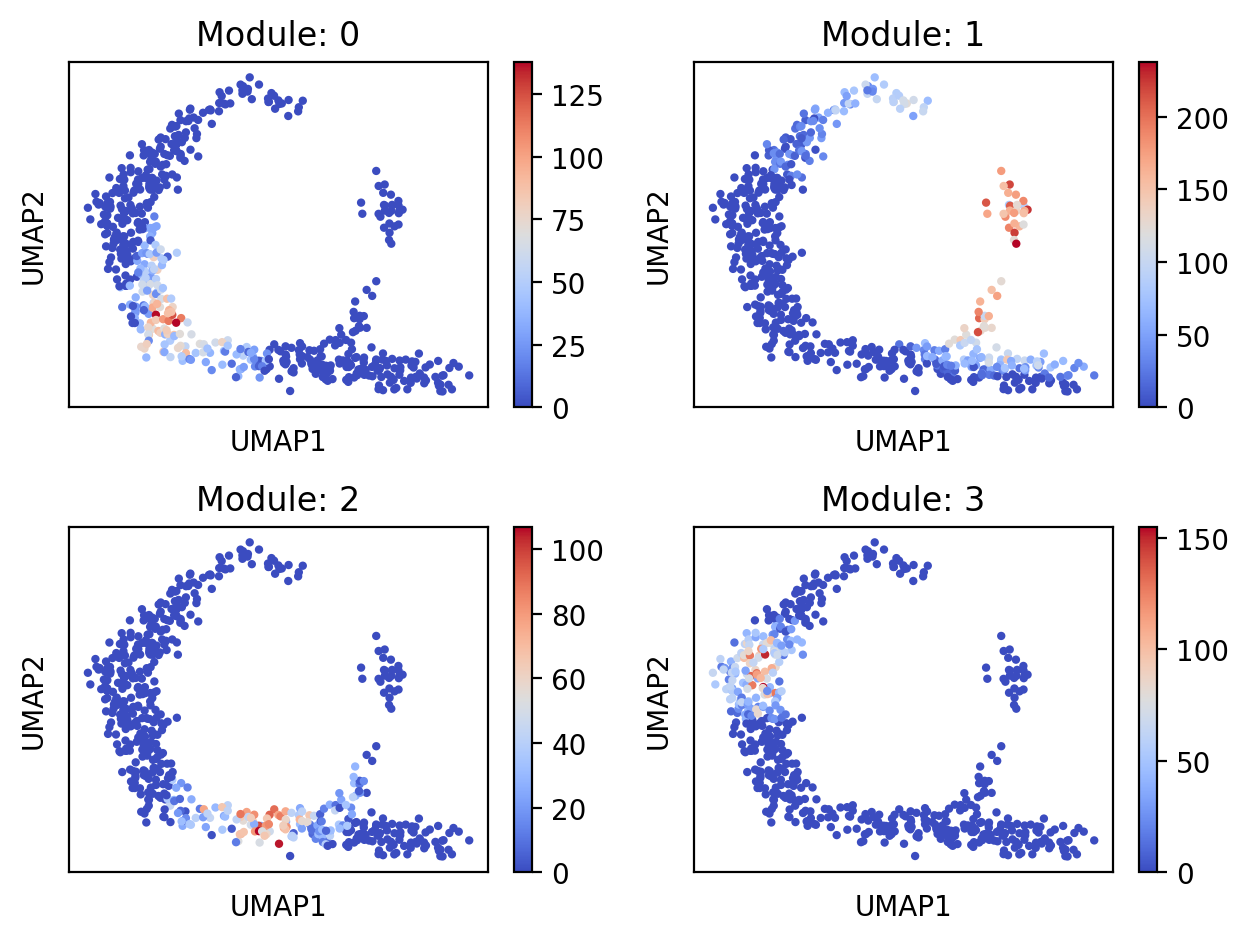

In [29]:
scores=hs.plot_gene_clusters(adata, gene_mods, ncols=2)

In [96]:
import seaborn as sb
import pandas as pd

In [109]:
adata.var_names.shape

(500,)

In [106]:
foo=pd.DataFrame(scores, index=sum.gene)

ValueError: Shape of passed values is (601, 4), indices imply (500, 4)

In [103]:
foo.index = gene_mods.gene

ValueError: Length mismatch: Expected axis has 601 elements, new values have 20 elements

ValueError: could not convert string to float: 'gene_242'

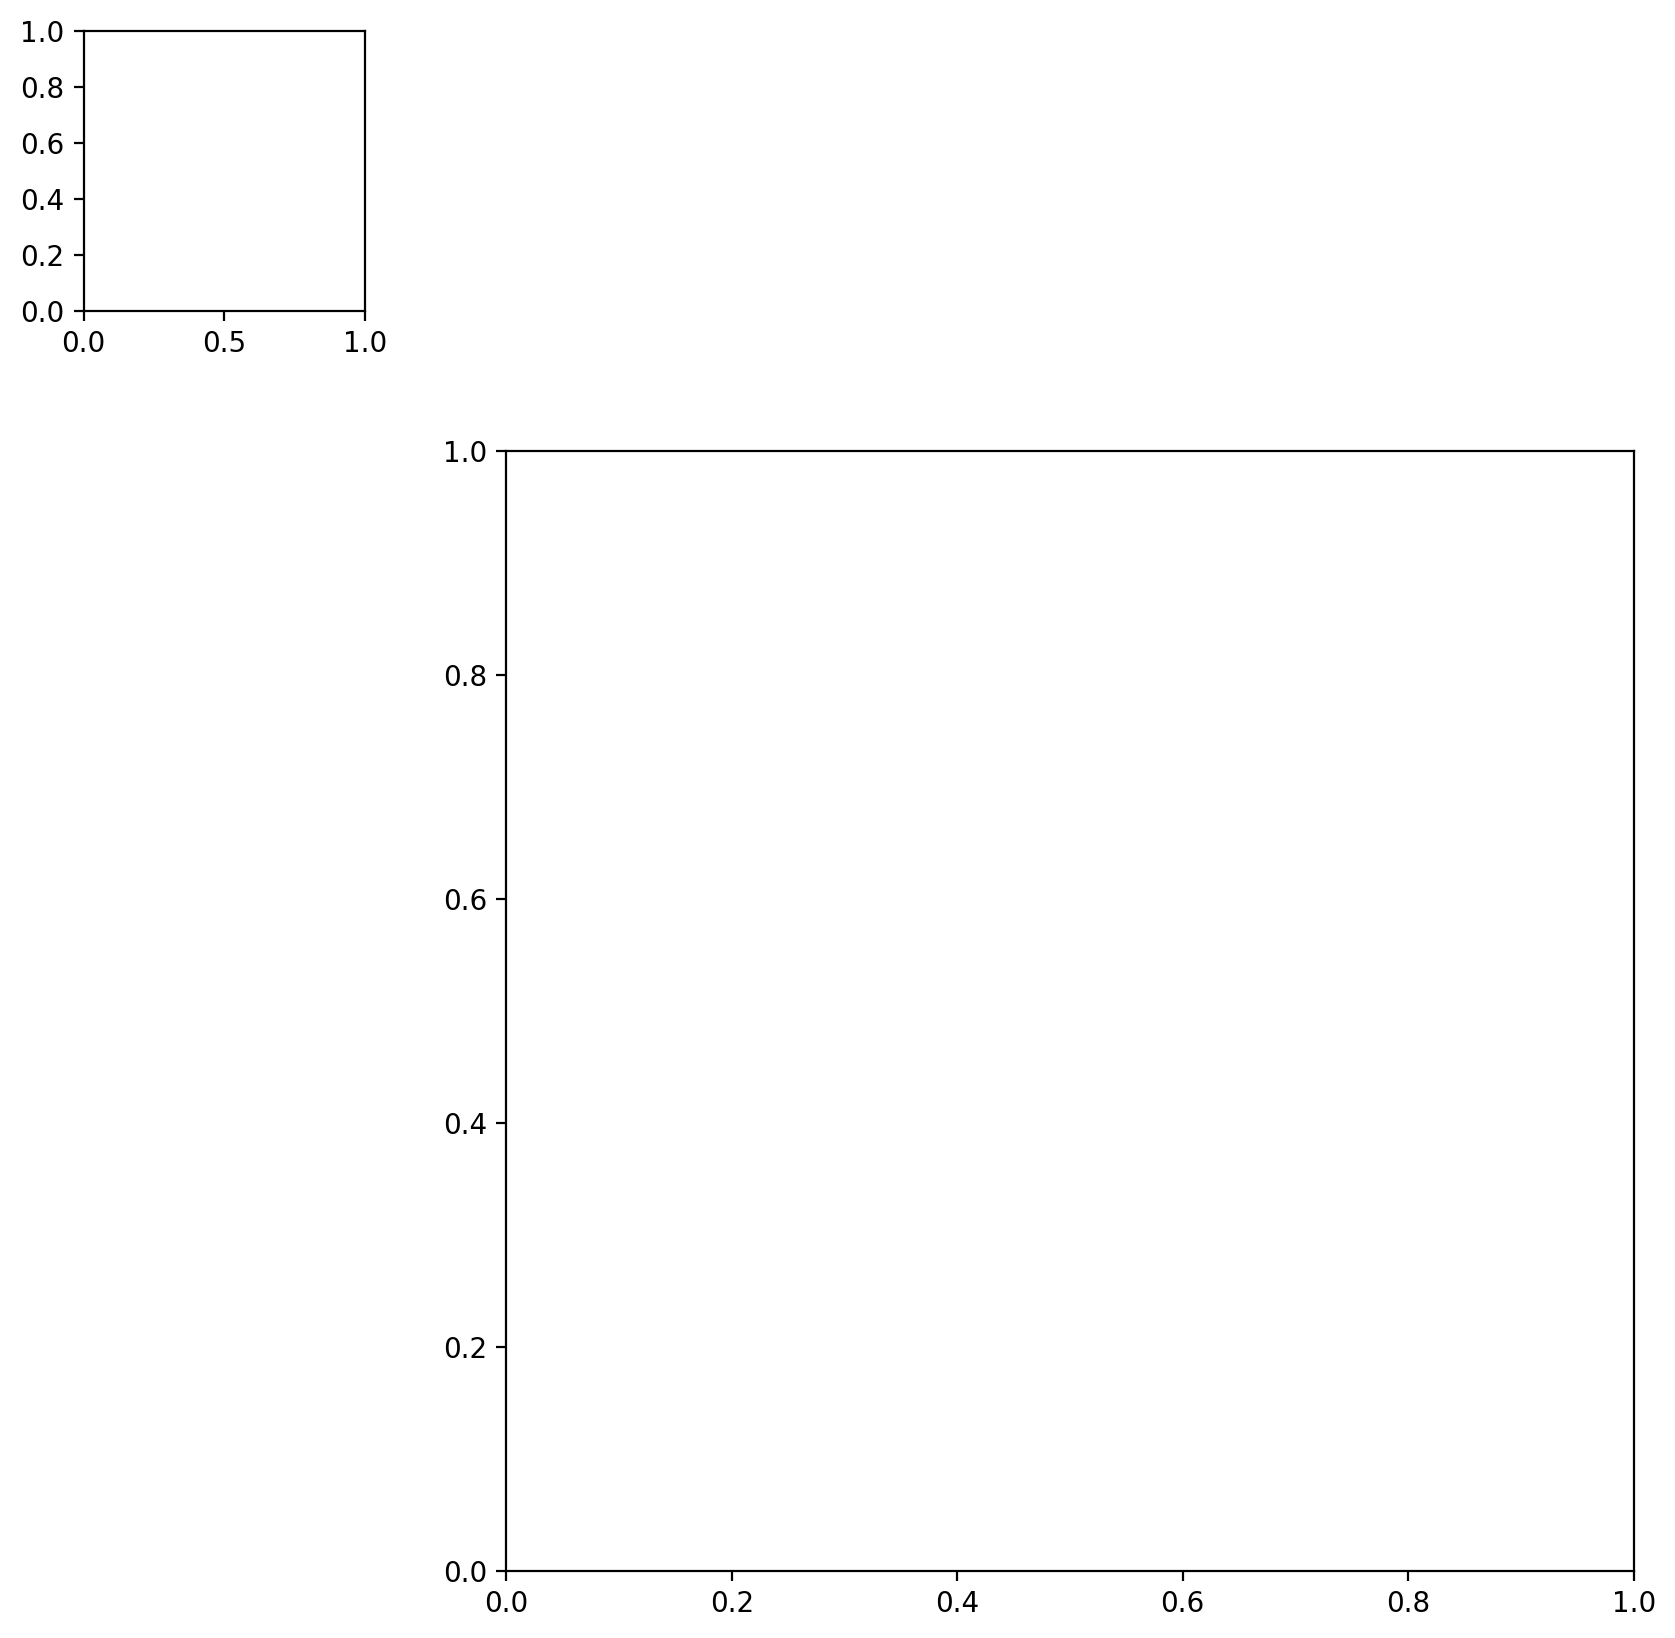

In [101]:
sb.clustermap(foo, col_cluster=False, cmap="Reds")

In [15]:
import numpy as np

In [21]:
scores = (scores - np.mean(scores, axis=0))/np.std(scores, axis=0)

<AxesSubplot: >

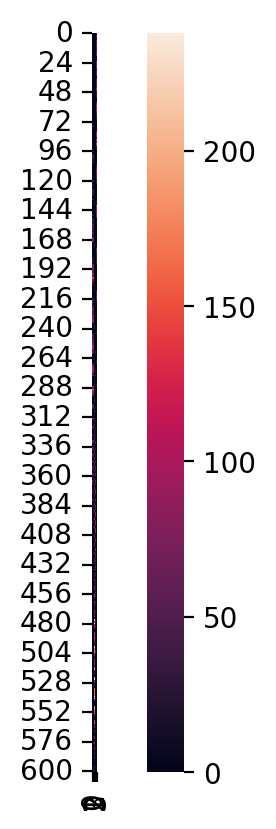

In [90]:
sb.heatmap(scores)

In [36]:
(scores.transpose() - np.mean(scores, axis=1)) / np.std(scores, axis=1)

/var/folders/n6/545knts914jdtmsjz1vgpd8w0000gn/T/ipykernel_65313/824129013.py:1: RuntimeWarning: invalid value encountered in divide
  (scores.transpose() - np.mean(scores, axis=1)) / np.std(scores, axis=1)


array([[-0.57735027, -0.57735027, -0.57735027, ...,         nan,
        -0.57735027, -0.57735027],
       [-0.57735027, -0.57735027, -0.57735027, ...,         nan,
         1.73205081,  1.73205081],
       [-0.57735027, -0.57735027, -0.57735027, ...,         nan,
        -0.57735027, -0.57735027],
       [ 1.73205081,  1.73205081,  1.73205081, ...,         nan,
        -0.57735027, -0.57735027]])

In [39]:
x=np.array([[1,2],[3,4],[5,6]])
x

array([[1, 2],
       [3, 4],
       [5, 6]])

In [42]:
x_mean = np.mean(x, axis=1)
x_mean

array([1.5, 3.5, 5.5])

In [43]:
x_std = np.std(x, axis=1)
x_std

array([0.5, 0.5, 0.5])

In [56]:
foo = (x.transpose() - x_mean) / x_std
foo = foo.transpose()
foo

array([[-1.,  1.],
       [-1.,  1.],
       [-1.,  1.]])

In [57]:
np.mean(foo, axis=1)

array([0., 0., 0.])

In [58]:
np.std(foo, axis=1)

array([1., 1., 1.])

In [59]:
foo

array([[-1.,  1.],
       [-1.,  1.],
       [-1.,  1.]])

In [60]:
def scale(x):
  x_mean = np.mean(x, axis=1)
  x_std = np.std(x, axis=1)
  x_z = (x.transpose() - x_mean) / x_std
  x_z = x_z.transpose()
  return x_z

In [61]:
scale(x)

array([[-1.,  1.],
       [-1.,  1.],
       [-1.,  1.]])

In [62]:
scale(scores)

/var/folders/n6/545knts914jdtmsjz1vgpd8w0000gn/T/ipykernel_65313/1138681986.py:4: RuntimeWarning: invalid value encountered in divide
  x_z = (x.transpose() - x_mean) / x_std


array([[-0.57735027, -0.57735027, -0.57735027,  1.73205081],
       [-0.57735027, -0.57735027, -0.57735027,  1.73205081],
       [-0.57735027, -0.57735027, -0.57735027,  1.73205081],
       ...,
       [        nan,         nan,         nan,         nan],
       [-0.57735027,  1.73205081, -0.57735027, -0.57735027],
       [-0.57735027,  1.73205081, -0.57735027, -0.57735027]])

In [63]:
scores

array([[ 0.,  0.,  0., 16.],
       [ 0.,  0.,  0., 14.],
       [ 0.,  0.,  0., 53.],
       ...,
       [ 0.,  0.,  0.,  0.],
       [ 0., 38.,  0.,  0.],
       [ 0., 26.,  0.,  0.]])

In [65]:
scores.shape

(601, 4)

In [86]:
sc.pp.pca(adata)
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=10)

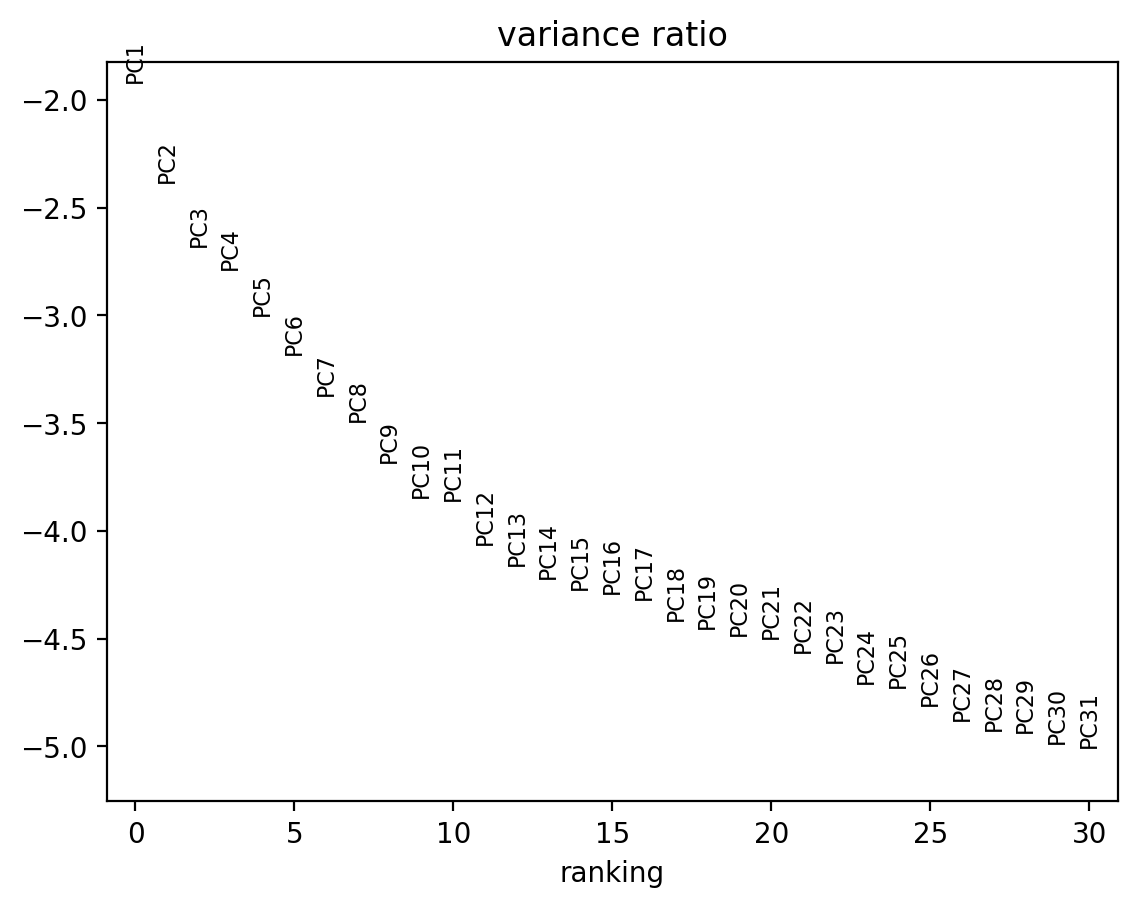

In [87]:
sc.pl.pca_variance_ratio(adata, log=True)

In [89]:
sc.tl.louvain(adata)

BaseException: Could not construct partition: vector

In [107]:
adata

AnnData object with n_obs × n_vars = 601 × 500
    uns: 'neighbors', 'pca'
    obsm: 'X_tsne', 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'